# Ensemble in a Nutshell: Bagging, Boosting and Stacking  

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

___

## What is Ensemble?

As the word *Ensemble* suggests a group viewed as a whole rather than individually, the same can be said for the **Ensemble Techniques**.   
Many a time our model suffers from large variance (giving unacceptably different accuracies each time). So a way of securing better and reliable accuracy from such models is to fit a whole bunch of different models and combine their performance rather than fitting a single model which may not be most stable. This is ensemble in a nutshell.

## Methods of Ensemble

There are three most prominent ensemble methods namely 
- **Bagging**
- **Boosting**
- **Stacking**

Each one taking a slightly different approach. The ensemble methods are most common while using algorithms like **Decision Trees**.  
Decision Trees is an algorithm whose model largely depends on the training data, the features used to train. Different splits, training data, features or threshold can give out vastly different decision trees so rather than hoping that we make correct decision and giving all in on a single model, using ensemble technique is very suitable and common approach.

____

## Bagging

**Bagging** is combination of the words **Bootstrap Aggregation** which in itself is derived from the technique Bootstrapping.  
Bootstrapping is the technique of combining the outputs of each of the models by averaging out the outputs of each of the model. The process involves

- **Build a model**
    - choose a sample from the training data
    - train a model
    - save the model
    -repeat for n times
- **Combining**
    - take the output of each of the model and take the average

*Note that Bagging is **NOT** same as Random Forests!* 

There's a slight difference between the random forest and decision trees is that Random Forests use a sample of features and go with the one which gives the best split out of the choosen subset.  
While in the bootstrapping all the features are considered for the split and are used in the model.

For the illustration We are using the sklearn in-built Iris dataset (of course!)

In [24]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

sns.set_style('darkgrid')

In [25]:
iris = datasets.load_iris()
iris = dict(iris)
print(iris.keys())
print(iris['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ==

For the ease of plotting we will use only two features out of four

In [92]:
X, y = iris['data'][:, 1:3], iris['target']
print(X[:10], y[:10])

[[3.5 1.4]
 [3.  1.4]
 [3.2 1.3]
 [3.1 1.5]
 [3.6 1.4]
 [3.9 1.7]
 [3.4 1.4]
 [3.4 1.5]
 [2.9 1.4]
 [3.1 1.5]] [0 0 0 0 0 0 0 0 0 0]


#### Splitting the dataset

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

#### Instantiating the Classifier Models

We are using two individual classifiers  
- Decision Tree
- K Nearest Neighbors 


In [99]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 1)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors= 1)

Now we make the bagged models of the above classifiers.  
We are using 10 estimators with 80% of the training samples.

In [101]:
from sklearn.ensemble import BaggingClassifier
bagging1 = BaggingClassifier(base_estimator= classifier1, n_estimators= 10, max_samples= 0.8)
bagging2 = BaggingClassifier(base_estimator= classifier2, n_estimators= 10, max_samples= 0.8)

#### Plotting the performance and classifying regions

In [102]:
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

Accuracy : 0.6762838468720821 for Decision Tree Classifier
Accuracy : 0.9616090880796763 for K Neighbors Classifier
Accuracy : 0.8404295051353875 for Bagging Tree
Accuracy : 0.9428260192966075 for Bagging K-NN


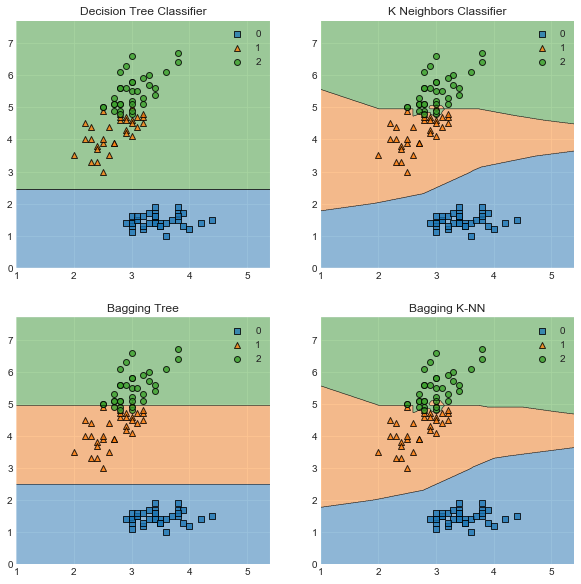

In [103]:
plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)

estimators_names = ['Decision Tree Classifier', 'K Neighbors Classifier', 'Bagging Tree', 'Bagging K-NN']
estimators_list = [classifier1, classifier2, bagging1, bagging2]

for estimator, est_name, grd in zip(estimators_list, estimators_names, grid):
    
    scores = cross_val_score(estimator, X_train, y_train, scoring= 'accuracy')
    print("Accuracy : {} for {}".format(scores.mean(), est_name))
    
    estimator.fit(X_train,y_train)
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train, y_train, clf = estimator)    
    
    plt.title(est_name)

#### Observation  
From the above we can observe that in case of Decision Trees our accuracy hiked from 67% to 84% on switching to Bagged trees.  
On the opposite the accuracy dropped to 96% from 49% in case of Nearest Neighbors.  
The KNN is a more stable algorithm and is less sensitive to pertubation in the data and combining such stable algorithms is not the most advantageous.

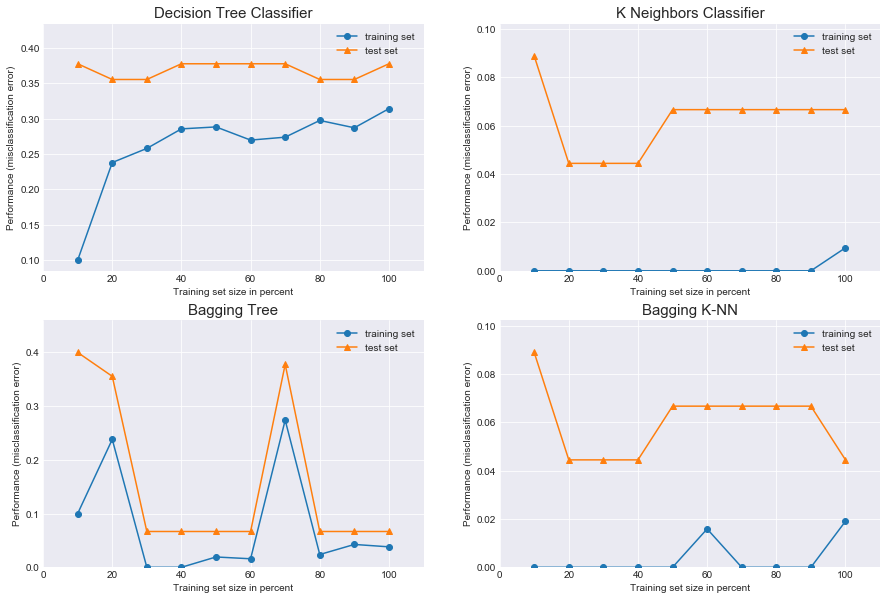

In [104]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)
for estimator, est_name, grd in zip(estimators_list, estimators_names, grid):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    plot_learning_curves(X_train, y_train, X_test, y_test, estimator, legend_loc= 'best', style= 'ggplot')
    
    plt.title(est_name, fontdict = {'fontsize':15})

We can see that in case of Bagged Trees the error is slightly less than the individual model and the distance between the training and testing plot is very close. So our ensemble worked quite good!  
However in case of KNN there is definitely some overfitting and the training set performance is even lesser than individual KNN at some points.

In [105]:
numEstimators = np.linspace(1,100, 10).astype(int)
bagging_mean = []
bagging_std = []
for n_est in numEstimators:
    
    bagging1 = BaggingClassifier(classifier1, n_estimators= n_est, max_samples= 0.8, max_features= 1)
    
    scores = cross_val_score(bagging1, X_train, y_train, scoring = 'accuracy')
    
    bagging_mean.append(scores.mean())
    bagging_std.append(scores.std())

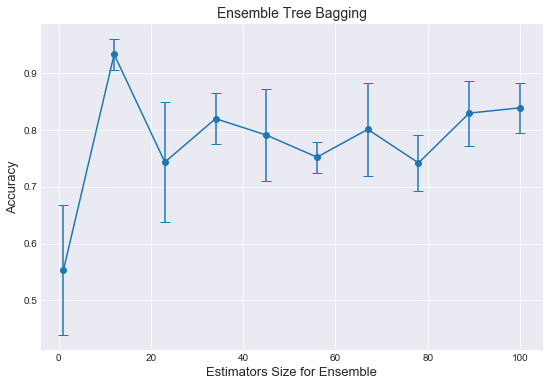

In [106]:
plt.figure(figsize=(9,6))
plt.errorbar(numEstimators, bagging_mean, yerr= bagging_std, fmt= '-o', capsize= 5)
plt.ylabel('Accuracy', fontdict = {'fontsize' : 13})
plt.xlabel('Estimators Size for Ensemble', fontdict = {'fontsize' : 13})
plt.title('Ensemble Tree Bagging', fontdict = {'fontsize' : 14})
plt.show()

From the above error plot the we can see that the accuracy increases in the range of 10-20 base estimators and remains around the same till 100 estimators so using the estimators above 10-15 would only increase complexity but not the performance sufficiently.

____

## Boosting

The concept of Boosting is slightly different than that of Bagging.  
As bagging is a parallel ensemble technique, boosting is a sequential ensemble technique, means the models are built in sequence with each model being an improvement of the previous one.  
In case of Classifying trees, the first model after training classifies some points correctly and other incorrectly. In the model that follows the points which were wrongly classified by the previous one will carry more weight than the ones which were already correctly classified and weighted majority voting is done to predict the final classifications.
It converts the group of weak learners into strong learners.  
This is the approach which is known as **AdaBoost (Adaptive Boosting)**.

In [113]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 1)

In [114]:
from sklearn.ensemble import AdaBoostClassifier

#### plotting the performance and classifying regions

We are here plotting 4 boosted decision tree classifiers each with different number of estimators.

Accuracy : 0.6762838468720821 for Estimators = 1
Accuracy : 0.9515406162464987 for Estimators = 2
Accuracy : 0.9515406162464987 for Estimators = 3
Accuracy : 0.8949268596327419 for Estimators = 10


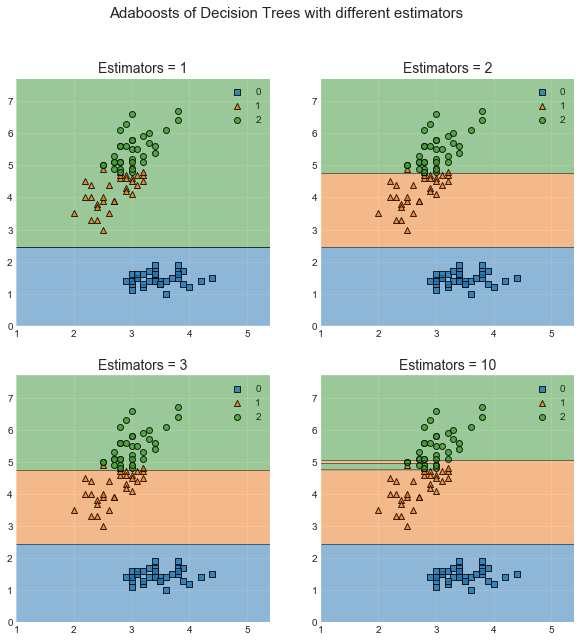

In [115]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)
fig.suptitle('Adaboosts of Decision Trees with different estimators', fontsize = 15)

estimators_names = ['Estimators = 1', 'Estimators = 2', 'Estimators = 3', 'Estimators = 10']
numEst = [1, 2, 3, 10]

for num_est, est_name, grd in zip(numEst, estimators_names, grid):
    
    estimator = AdaBoostClassifier(base_estimator= decisionTree, n_estimators= num_est)
    estimator.fit(X_train,y_train)
    
    scores = cross_val_score(estimator, X_train, y_train, scoring= 'accuracy')
    print("Accuracy : {} for {}".format(scores.mean(), est_name))
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train, y_train, clf = estimator)    

    plt.title(est_name, fontdict = {'fontsize' : 14})

In [116]:
estimators_list = [AdaBoostClassifier(base_estimator= decisionTree, n_estimators= 1),
 AdaBoostClassifier(base_estimator= decisionTree, n_estimators= 2),
 AdaBoostClassifier(base_estimator= decisionTree, n_estimators= 3),
 AdaBoostClassifier(base_estimator= decisionTree, n_estimators= 10)]

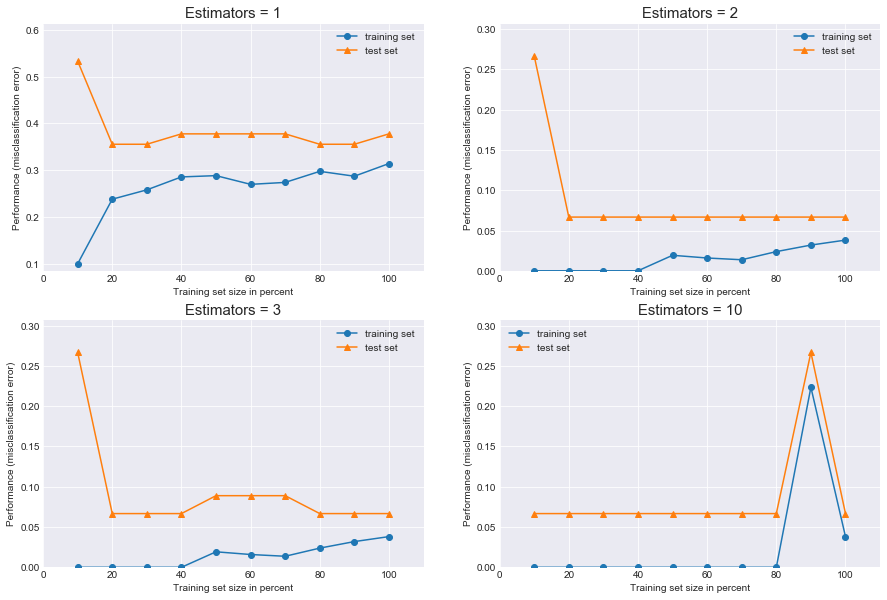

In [117]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)
for estimator, est_name, grd in zip(estimators_list, estimators_names, grid):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    plot_learning_curves(X_train, y_train, X_test, y_test, estimator, legend_loc= 'best', style= 'ggplot')
    
    plt.title(est_name, fontdict = {'fontsize':15})

In [118]:
numEstimators = np.linspace(1,100, 10).astype(int)
boosting_mean = []
boosting_std = []
for n_est in numEstimators:
    
    bagging1 = AdaBoostClassifier(classifier1, n_estimators= n_est)
    
    scores = cross_val_score(bagging1, X_train, y_train, scoring = 'accuracy')
    
    boosting_mean.append(scores.mean())
    boosting_std.append(scores.std())

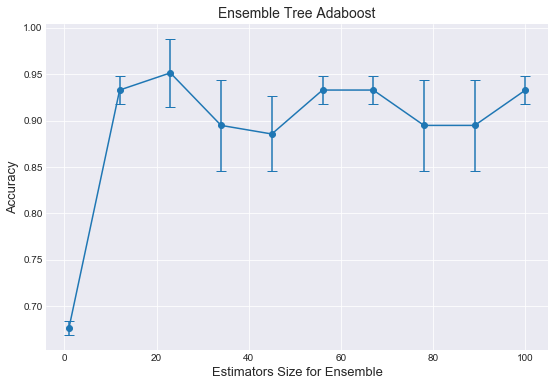

In [119]:
plt.figure(figsize=(9,6))
plt.errorbar(numEstimators, boosting_mean, yerr= boosting_std, fmt= '-o', capsize= 5)
plt.ylabel('Accuracy', fontdict = {'fontsize' : 13})
plt.xlabel('Estimators Size for Ensemble', fontdict = {'fontsize' : 13})
plt.title('Ensemble Tree Adaboost', fontdict = {'fontsize' : 14})
plt.show()

## Stacking

Stacking is also an ensemble technique which also has a more different. As the name suggests that it stacks the model, with a meta model at the top.   
A **meta-model** or **meta-classifier** uses the outputs of all the previous models built using different algorithms and uses them as features.

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [134]:
classifier1 = KNeighborsClassifier(n_neighbors= 10)
classifier2 = RandomForestClassifier()
classifier3 = GaussianNB()
logisticR = LogisticRegression()
stackedLR = StackingClassifier(classifiers= [classifier1, classifier2, classifier3], meta_classifier= logisticR)

Accuracy : 0.9515406162464987 for K Neighbors
Accuracy : 0.9229536258948023 for Random Forest
Accuracy : 0.9145035792094616 for Naive Bayes
Accuracy : 0.9515406162464987 for Stacked with Logistic Regression


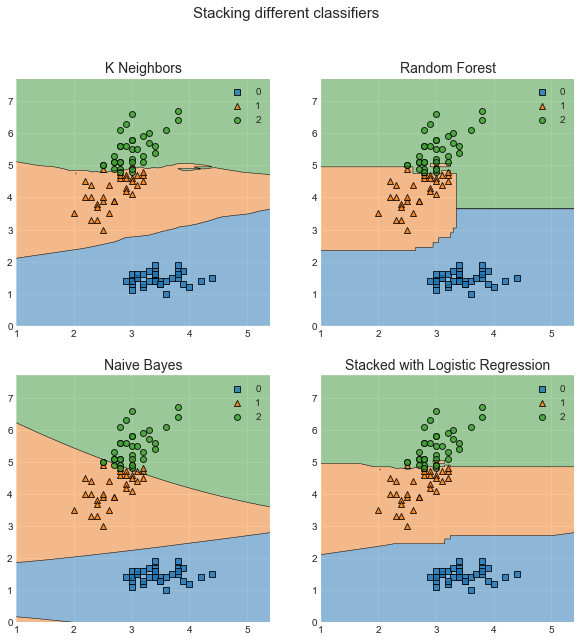

In [135]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)
fig.suptitle('Stacking different classifiers', fontsize = 15)

estimators_names = ['K Neighbors', 'Random Forest', 'Naive Bayes', 'Stacked with Logistic Regression']
estimators_list = [classifier1, classifier2, classifier3, stackedLR ]

stacking_mean = []
stacking_std = []

for estimator, est_name, grd in zip(estimators_list, estimators_names, grid):

    scores = cross_val_score(estimator, X_train, y_train, scoring= 'accuracy')
    print("Accuracy : {} for {}".format(scores.mean(), est_name))
    
    estimator.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train, y_train, clf = estimator)    
    
    stacking_mean.append(scores.mean())
    stacking_std.append(scores.std())

    
    plt.title(est_name, fontdict = {'fontsize' : 14})

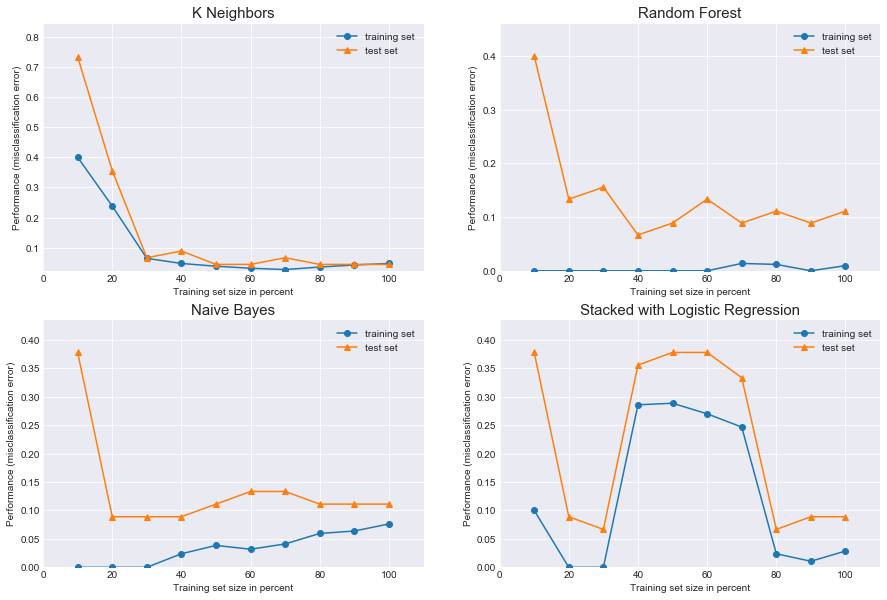

In [136]:
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(2,2)
grid = itertools.product([0,1], repeat= 2)
for estimator, est_name, grd in zip(estimators_list, estimators_names, grid):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    plot_learning_curves(X_train, y_train, X_test, y_test, estimator, legend_loc= 'best', style= 'ggplot')
    
    plt.title(est_name, fontdict = {'fontsize':15})

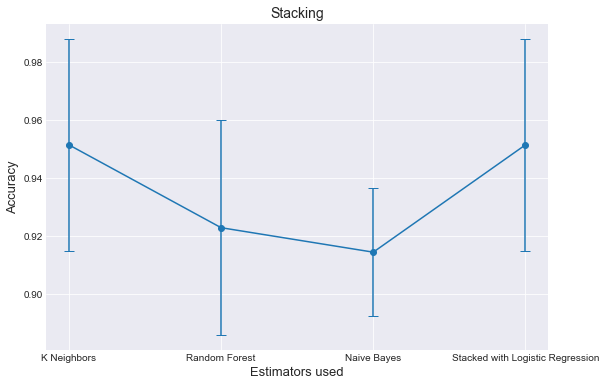

In [137]:
plt.figure(figsize=(9,6))
plt.errorbar(estimators_names, stacking_mean, yerr= stacking_std, fmt= '-o', capsize= 5)
plt.ylabel('Accuracy', fontdict = {'fontsize' : 13})
plt.xlabel('Estimators used', fontdict = {'fontsize' : 13})
plt.title('Stacking', fontdict = {'fontsize' : 14})
plt.show()

### de nada!